Zomato Data Analysis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create Data Frame

In [12]:
dataframe=pd.read_csv("Zomato data  .csv")

In [13]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [26]:
 # Convert the data type pf column - rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0]  
    return float(value)
dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [17]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Types of reataurant

Text(0.5, 0, 'Type of Restaurant')

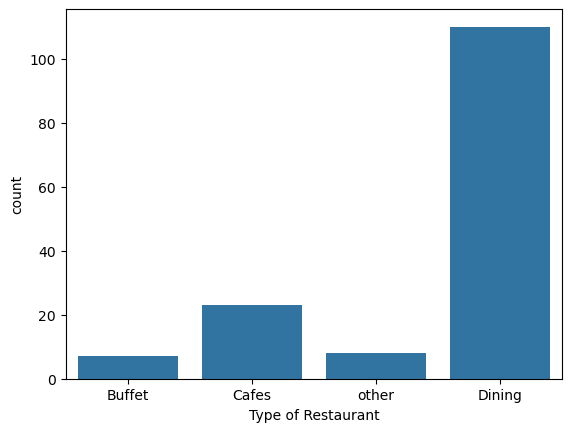

In [27]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

 # coclusion = majority of restaurant falls in Dining Category

Text(0, 0.5, 'votes')

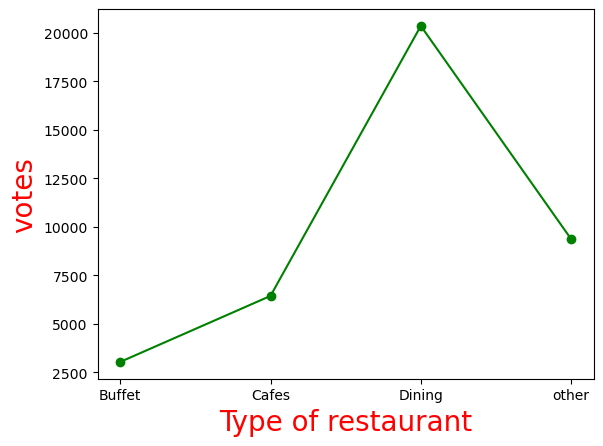

In [35]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green", marker="o")
plt.xlabel("Type of restaurant",c="red", size =20)
plt.ylabel("votes",c="red",size=20)

 # Conclusion = Dining restaurants has recieved maximum votes

In [37]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


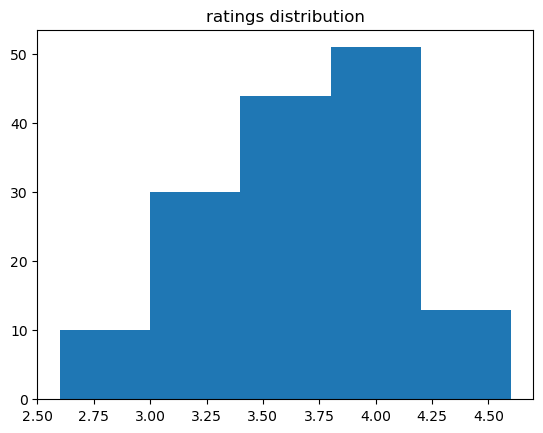

In [40]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

# coclusion = majority of restaurant recieves ratings from 3.5 to 4

Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

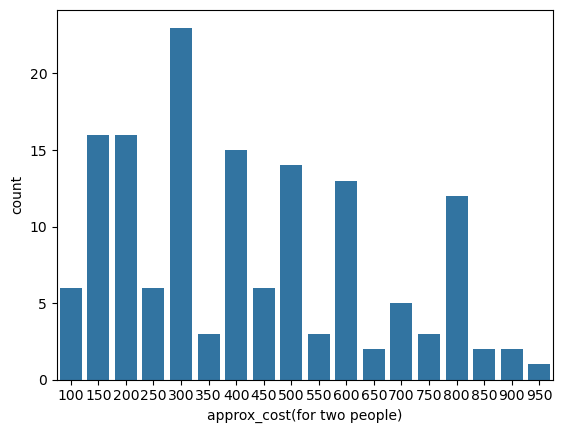

In [47]:
couple_data=dataframe['approx_cost(for two people)']

sns.countplot(x=couple_data)

Conclusion = The Majority of couple prefer restaurant with an approx cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

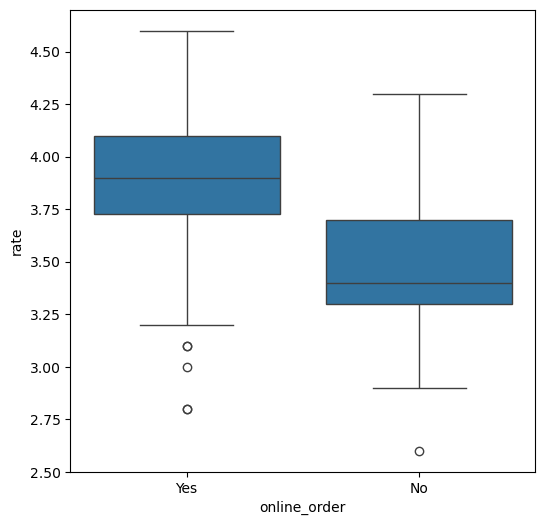

In [45]:
# Rating based 
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

 # conclusion- Offline order recieved Lower Rating in comparison to online order

In [50]:
dataframe.head(3)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


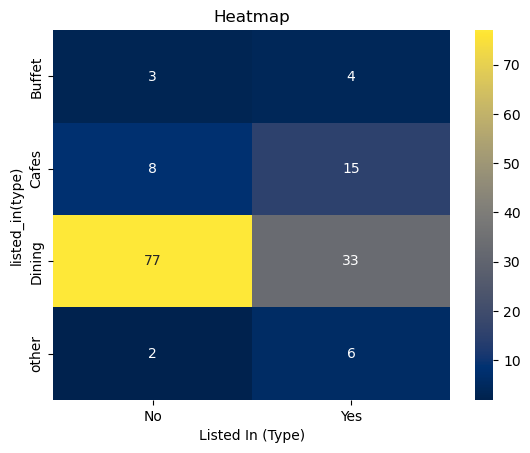

In [53]:
pivot_table=dataframe.pivot_table(index='listed_in(type)', columns='online_order',
                                  aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap="cividis",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.xlabel("Listed In (Type)")
plt.show()


Conclusion = Dining Resataurant accept offline orders,whereas cafes primarily recieves online oredrs.Important insight clients preffered

